## Application - Face recognition

In order to apply all the concepts of Unsupervised learning, let’s take a look at the facial recognition problem. 

We will use the Faces in the scikit learn dataset, which consists of several thousand collated photos of various public figures.

You have two days to do this challenge. 

**Steps**:
- the first part consist to explore the dataset and think on the problem using unsupervised learning (dimensionality reduction). You can try to use different models to reduce the problem.
- The second part consist to build a model to classify the faces according to the target given by the dataset. 

## Import libraries

In [161]:
import time

# Import data images
from sklearn.datasets import fetch_lfw_people

# Data visualization
import seaborn as sns
import seaborn as sns; sns.set() # use seaborn plotting defaults
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

# Algorithms
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Evaluate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Pipelines
from sklearn.pipeline import Pipeline

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

# Deploy
import pickle

## Import dataset

In [2]:
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

--------------------------------

## Data Exploration

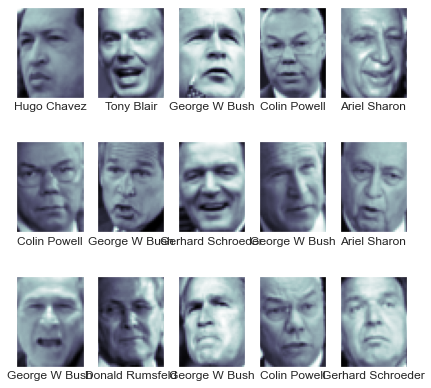

In [4]:
fig, ax = plt.subplots(3, 5, figsize=(7,7))

# plot images
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

faces.images contains the images in pixels that you can use to plot

In [68]:
images_shape = faces.images.shape
images_shape

(1288, 50, 37)

faces.data contains the flattened images that you can use to build your model. This is the equivalent to do faces.images.reshape(1288,1850)

In [3]:
X = faces.data
X

array([[254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
         86.666664],
       [ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
        133.66667 ],
       [ 89.333336, 104.      , 126.      , ..., 175.33333 , 183.33333 ,
        183.      ],
       ...,
       [ 86.      ,  80.333336,  74.666664, ...,  44.      ,  49.666668,
         44.666668],
       [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
        166.33333 ],
       [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
         61.      ]], dtype=float32)

faces.target contains the annotation of each face

In [4]:
y = faces.target
y

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [153]:
names = faces.target_names
names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

-----------------------------

## ML Modeling

Hint: start doing dimensionality reduction (e.g. PCA) and try to understand the impact of using this technique on the images. Try with 100 components, fit_transform the dataset and then, use the inverse_transform to get the new image 'compressed'

At the end, try visualized all the compressed images
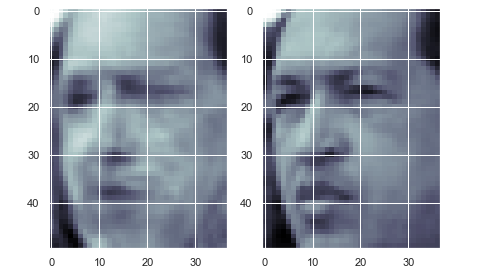

### SVM

In [109]:
def model_SVM(X, y):
    # split data to train/test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

    # fit SVC model
    clf = SVC(C=10, gamma=0.001)
    %timeit clf.fit(X_train, y_train)

    # get accuracy score
    accuracy_train = clf.score(X_train, y_train)
    accuracy_test = clf.score(X_test, y_test)
    print('Accuracy - train data: {}'.format(accuracy_train))
    print('Accuracy - test data : {}'.format( accuracy_test))

    # prediction
    test_pre = clf.predict(X_test)
    train_pre = clf.predict(X_train)

    # F1 _score
    f1_train = f1_score(y_train,train_pre,average='weighted')
    f1_test = f1_score(y_test,test_pre,average='weighted')
    print("f1 score - test data  : {}" .format(f1_test))

In [110]:
model_svm = model_SVM(X, faces.target)

3 s ± 245 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Accuracy - train data: 1.0
Accuracy - test data : 0.4186046511627907
f1 score - test data  : 0.24704536789935186


### SVM w/ PCA

#### Explained Variance

In [37]:
def exp_variance(X, y, var):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=365)

    # PCA transformation and reduce the dimension from 1850 to 50
    pca = PCA(n_components=var, whiten=True)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    # plot explained variance w/ 50 components chosen
    plt.plot(pca.explained_variance_ratio_.cumsum())
    plt.title('Explained Variance',fontsize=15)
    plt.xlabel('Number of Principle Components', fontsize=10)
    plt.show()

    return pca.explained_variance_

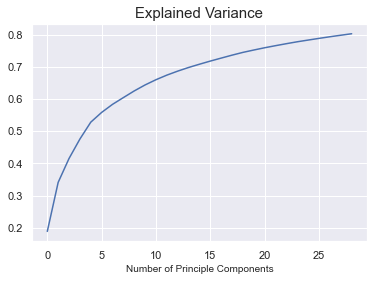

array([489999.78  , 396335.    , 193146.39  , 157177.83  , 136271.52  ,
        78904.19  ,  65138.16  ,  54658.734 ,  53853.184 ,  48464.684 ,
        42181.49  ,  37037.156 ,  32379.691 ,  29383.91  ,  26357.969 ,
        25463.05  ,  24077.928 ,  23774.412 ,  22370.896 ,  19095.16  ,
        18324.79  ,  16808.926 ,  16104.734 ,  15406.1045,  13808.825 ,
        13658.068 ,  13022.167 ,  12346.305 ,  12019.312 ], dtype=float32)

In [38]:
# define components which cover at least 80% of data
exp_variance(X, y, 0.8)

In [41]:
def n_components(X, y, var):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=365)

    # PCA transformation and reduce the dimension from 1850 to 50
    pca = PCA(n_components=var, whiten=True)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    return len(pca.explained_variance_)

In [42]:
n_cmps = n_components(X, y, 0.8)

In [127]:
def model_pxl_PCA(X, n_cmps):
    # PCA transformation and choosing dimensions which have at least 80% of data coverage
    pca = PCA(n_components=n_cmps, whiten=True).fit(X)

    return pca


In [132]:
def model_cmps_PCA(X, n_cmps):
    # PCA transformation and choosing dimensions which have at least 80% of data coverage
    pca = PCA(n_components=n_cmps, whiten=True).fit_transform(X)

    return pca


In [129]:
model_pxl_pca = model_pxl_PCA(X, n_cmps)

### PCA face recognition

Hint: try to understand what the components represent with respect to the images. To do so, plow the components of the image 0 to 10

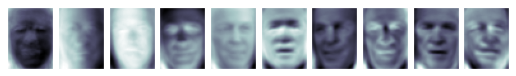

In [130]:
# plot first ten components
fig, axes = plt.subplots(1, 10, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(model_pxl_pca.components_[i].reshape(50, 37), cmap='bone')

Hint: build your classification model using your best reduction model as preprocessing in a pipeline ... use a Support Vector Machine

In [133]:
# define components w/out scaling
model_cmps_pca = model_cmps_PCA(X, n_cmps)
model_svm_w_pca = model_SVM(model_cmps_pca, y)

150 ms ± 27.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Accuracy - train data: 0.7970873786407767
Accuracy - test data : 0.748062015503876
f1 score - test data  : 0.7329183167717452


----------------

## ML Tuning

### Pipeline

Hint: perform model tuning to find the best hyper parameters. First, fine tune the SVC to reduce the complex calculation and time. Then, fine tune the PCA using a pipeline. 

In [137]:
SVC_pipe = Pipeline([
    ('PCA', PCA(n_components=n_cmps)),
    ('SVM', SVC())])
SVC_pipe

Pipeline(steps=[('PCA', PCA(n_components=29)), ('SVM', SVC())])

#### Hold out split method

In [146]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Train pipeline
SVC_pipe_trained = SVC_pipe.fit(X_train,y_train)

# Make predictions
SVC_pipe_trained.predict(X_test)

# Score model
SVC_pipe_trained.score(X_test,y_test)

0.6666666666666666

#### Cross validation split method

In [147]:
# Cross validate pipeline
cross_val_score(SVC_pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.6747943523634131

In [148]:
# Get all params of the trained pipe
SVC_pipe_trained.get_params()

{'memory': None,
 'steps': [('PCA', PCA(n_components=29)), ('SVM', SVC())],
 'verbose': False,
 'PCA': PCA(n_components=29),
 'SVM': SVC(),
 'PCA__copy': True,
 'PCA__iterated_power': 'auto',
 'PCA__n_components': 29,
 'PCA__random_state': None,
 'PCA__svd_solver': 'auto',
 'PCA__tol': 0.0,
 'PCA__whiten': False,
 'SVM__C': 1.0,
 'SVM__break_ties': False,
 'SVM__cache_size': 200,
 'SVM__class_weight': None,
 'SVM__coef0': 0.0,
 'SVM__decision_function_shape': 'ovr',
 'SVM__degree': 3,
 'SVM__gamma': 'scale',
 'SVM__kernel': 'rbf',
 'SVM__max_iter': -1,
 'SVM__probability': False,
 'SVM__random_state': None,
 'SVM__shrinking': True,
 'SVM__tol': 0.001,
 'SVM__verbose': False}

In [195]:
parameters = {'PCA__n_components': [29, 50, 100, 150, 200, 300, 500],
              'C': [1e3, 5e3, 1e4, 5e4],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel' : ('linear', 'rbf', 'sigmoid', 'poly')}

def grid_search(pipeline_model, features, target, params, people):
    # Applying Grid Search Algorithm
    print("Fitting the classifier to the training set")
    param_grid = params
    clf = GridSearchCV(
        pipeline_model,
        params,
        scoring="accuracy"
    )

    # split data
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

    clf = clf.fit(X_train, y_train)
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

    print("Predicting people's names on the test set")
    y_pred = clf.predict(X_test)

    # print classification results
    print(classification_report(y_test, y_pred, target_names = people.target_names))

In [196]:
grid_search(SVC_pipe, X, y, parameters, faces)

Fitting the classifier to the training set


ValueError: Invalid parameter C for estimator Pipeline(steps=[('PCA', PCA(n_components=29)), ('SVM', SVC())]). Check the list of available parameters with `estimator.get_params().keys()`.

## Upgrade !!

Try to use different models for the dimensionality reduction (SVD, NMF)